#  Analysis of Titanic Passengers

### Jocelyn (Yuan) Li

## Variable Descrion
1. Survival: Survival(0 = No; 1 = Yes)
2. pclass: Passenger Class(1 = 1st[Upper]; 2 = 2nd[Middle]; 3 = 3rd[Lower])
3. name: Name
4. sex: Sex
5. age: Age
6. sibsp: Number of Siblings/Spouses Aboard
7. parch: Number of Parents/Children Aboard
8. ticket: Ticket Number
9. fare: Passenger Fare
10. cabin: Cabin
11. embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Problem
Analyze the Titanic Database and identify characteristics of survivors.

## EDA

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Load the train and test set.

In [3]:
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

Let's take a look at the summary and the head of the dataset.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the train info we can clearly see we have some missing values in Age, Cabin and Embarked.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Correlation Analysis 

In [6]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

From the corrlation we can see the pclass and fare variable play a critical to decide the survival rate.

## Univariable Analysis

###Survived Count (0 = No; 1 = Yes)

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

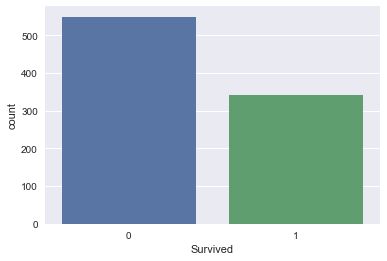

In [9]:
sns.countplot('Survived',data=train)

We can see only 342 out of 891 is survived, the survival rate is 39%.

### Pclass

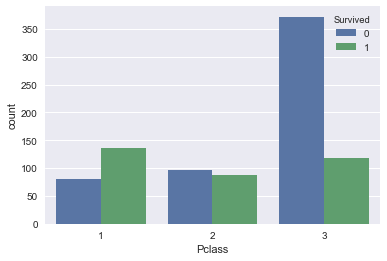

In [10]:
sns.countplot(x = 'Pclass',hue = 'Survived', data = train)

In [11]:
train['Survived']. groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Most people sit in the third class (lower leve), and we can the the class is a critical role in srivival rate, the survival descrease from the upper to lower class.

###Name

For the name column, first, I want to seperate one column into multiple columns withe commas. We can seperate the name clumns into first name, last name and the title. And I will analyze the relationship between title and survival rate.

In [12]:
train[ 'Name_Title' ] = train[ 'Name' ]. apply(lambda r: r.split(',')[1]). apply(lambda r: r.split('.')[0])

In [13]:
train['Name_Title'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Name_Title, dtype: object

In [14]:
train['Name_Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Ms                1
 Capt              1
 Mme               1
 Sir               1
 Don               1
 the Countess      1
 Lady              1
 Jonkheer          1
Name: Name_Title, dtype: int64

In [15]:
train['Survived']. groupby(train['Name_Title']).mean()

Name_Title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

Clearly, female has higher survival rate.

### Sex

In [16]:
train['Survived']. groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Female's survival rate is higher than male's, this again approved "Women and children first".

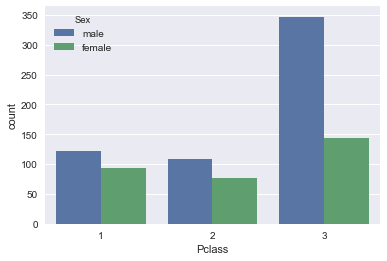

In [17]:
sns.countplot(x = 'Pclass', hue = 'Sex', data = train)

Also we can see most males sit in the lower level, that's probaly another reason why the male's survival rate is lower than females' survival rate.

### Age

There are some missing values for the age column. To better analyze the age, I cut the age into 5 different groups.

In [18]:
train['age_bucket']= pd.qcut(train['Age'],5)

In [19]:
train['Survived']. groupby(train['age_bucket']).mean()

age_bucket
[0.42, 19]    0.481707
(19, 25]      0.328467
(25, 31.8]    0.393701
(31.8, 41]    0.437500
(41, 80]      0.373239
Name: Survived, dtype: float64

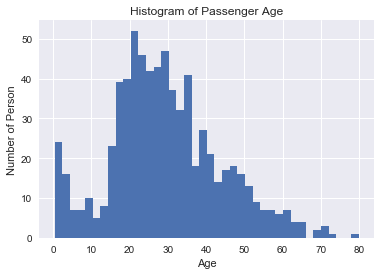

In [20]:
train.Age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age")



From the plot we can find most passenger's age is between 15 to 40.

### SibSp

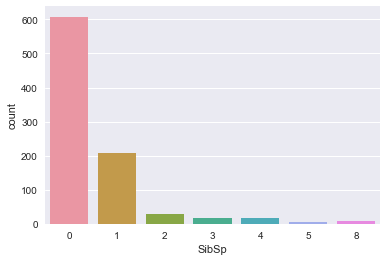

In [21]:
sns.countplot(x='SibSp', data=train)

In [22]:
train['Survived']. groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Most passengers have only one sibling/spouse, the more siblings/spouses they have on aboard, the lower the survival rate they have.

### Parch

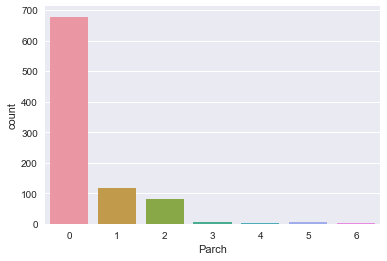

In [23]:
sns.countplot(x='Parch', data=train)

In [24]:
train['Survived']. groupby (train['Parch']). mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Most passengers have zero parents or children they have a lower likelihood of survival than otherwise.


### Ticket

I do not see the ticket column is very useful, cause this column contains unique alphanumeric value, we could analyze the fare and cabin value the get more information. But probably the length of the ticket has something to do with the survival rate?

In [25]:
train['ticket_len'] = train['Ticket']. apply (lambda x: len(x))

In [26]:
train['ticket_len']. value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: ticket_len, dtype: int64

In [27]:
train['Survived']. groupby (train['ticket_len']). mean()

ticket_len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

I didn't really see a clear relationship between the ticket length and the survival rate.

### Fare

C:\Users\yuali\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


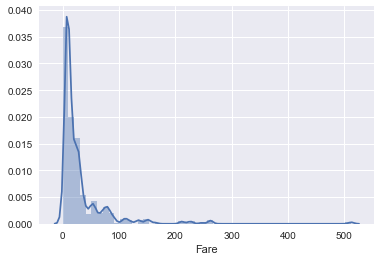

In [28]:
sns.distplot(train['Fare'])

In [29]:
train['Fare_bucket'] = pd.qcut(train['Fare'],5) 

To better understand the "fare" value, I break the the value into 3 buckets.

In [30]:

train['Survived']. groupby( train['Fare_bucket']).mean()

Fare_bucket
[0, 7.854]           0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

The fare values should have a close relationship with the passenger's Classes.

In [31]:
pd.crosstab(train['Fare_bucket'], train['Pclass'])

Pclass,1,2,3
Fare_bucket,,,
"[0, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


Cliearly, the better the passenger's clasee the higher the prcie of the ticket, also high survival rate.

### Cabin

We see a lot of NULL values for Cabin,  The usefulness of this column might be similar to that of the Ticket variable.

In [32]:
train['Cabin_Bucket'] = train['Cabin'].apply(lambda x: str(x)[0])

In [33]:
train['Cabin_Bucket'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Bucket, dtype: int64

In [34]:
train['Survived']. groupby (train['Cabin_Bucket']).mean()

Cabin_Bucket
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

We can see that most of the cabin letters are associated with a very high survival rate, like Cabin B, D, E, F.


In [35]:
cabin = pd.DataFrame()
cabin[ 'Cabin' ] = train[ 'Cabin' ]. fillna( 'Z' )
cabin[ 'Cabin' ] = cabin[ 'Cabin' ]. map( lambda c : c[0] )
cabin = pd.get_dummies( cabin['Cabin'], prefix = 'Cabin_Bucket')

In [36]:
cabin.head()

,Cabin_Bucket_A,Cabin_Bucket_B,Cabin_Bucket_C,Cabin_Bucket_D,Cabin_Bucket_E,Cabin_Bucket_F,Cabin_Bucket_G,Cabin_Bucket_T,Cabin_Bucket_Z
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


### Embarked

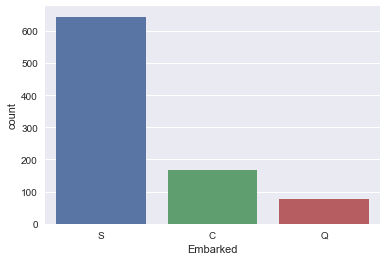

In [37]:
sns.countplot('Embarked', data = train)

Most passengers enbarked from Southampton. 

In [38]:
train['Survived'].groupby(train['Embarked']). mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

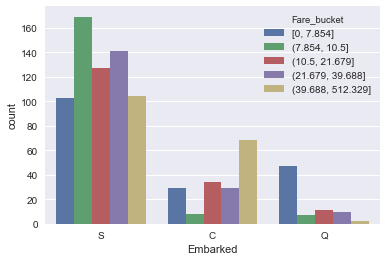

In [39]:
sns.countplot(train['Embarked'], hue=train['Fare_bucket'])

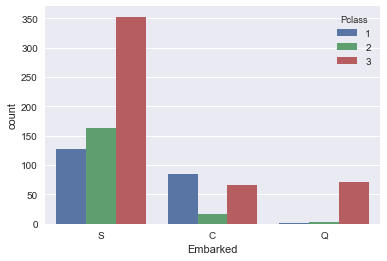

In [40]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

Looks like cherbourg passengers have a higher survival rate, and probably this is due to more passengers bought the upper-class ticket from that location.

We have finished the basic exploratory data analysis, next I will build some function and validate my model.


### Functions

First, I creat a name function and capture the title in the name variable.

In [41]:
def names(train, test):
    for i in [train, test]:
        i['Name_Title'] = i[ 'Name' ]. apply(lambda r: r.split(',')[1]). apply(lambda r: r.split('.')[0])
        del i['Name']
    return train, test   

next, I creat new family funciton. I combine the SibSp and Parch columns into a new variable that indicates family size, and group the family size variable into 4 categories.

In [42]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 4,'Small'),
                                 np.where((i['SibSp']+i['Parch']) <= 8,'Median','Large'))                                 
                                    
        del i['SibSp']
        del i['Parch']
    return train, test

Next, I build a function to the ticket length.

In [44]:
def ticket_len(train, test):
    for i in [train, test]:
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

Next, I build a function and extract the first letter of the Cabin column.

In [46]:
def Cabin_Bucket(train, test):
    for i in [train, test]:
        i['Cabin_Bucket'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

Next, I build a function for Embarked, and I use "S" to replace the NULL values.

In [47]:
def Embarked(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

Next, I build a function for Fare_bucket.